# Assignment 3

 In this Assignment, we will use CNN to classify digits.   
The `MNIST` database is a large database of handwritten digits that is commonly used for training various image processing systems.



## Importing TensorFlow

In [35]:
import tensorflow as tf

## Get the dataset

In [36]:
# Import the dataset

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [37]:
# Split the dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_test,y_test,test_size=0.2)

In [38]:
# Pre processing 

## Visualize the dataset
Print some images with labels.

(8000, 28, 28)
(8000,)
(2000, 28, 28)
(2000,)


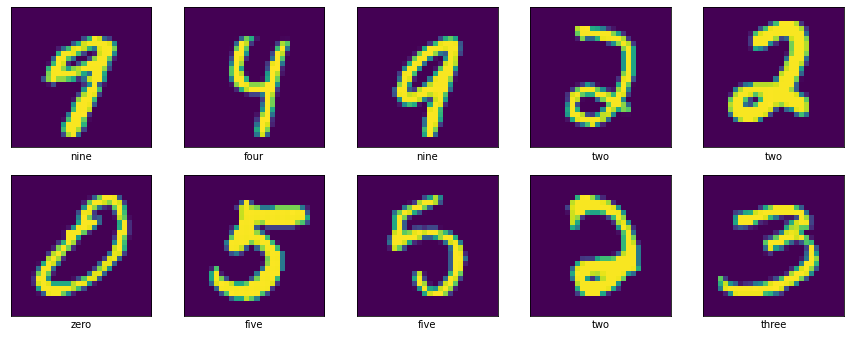

In [39]:
import matplotlib.pyplot as plt

# Your code
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
class_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i])
    plt.xlabel(class_names[(Y_train[i])])
plt.show()

Plot statistics of the training and testing dataset  
(`x axis`: digits, `y axis`: number of samples corresponding to the digits)

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 0]


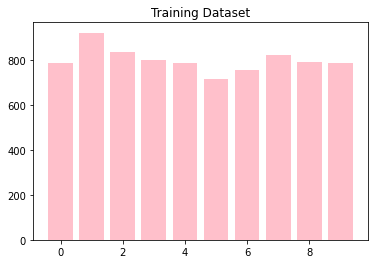

In [40]:
import numpy as np

x1=np.array([0,1,2,3,4,5,6,7,8,9])
y1=np.array([0,0,0,0,0,0,0,0,0,0])
print(x1)
print(y1)

for i in range(8000):
  extra=np.where(x1==Y_train[i])
  y1[extra]=y1[extra]+1

plt.title("Training Dataset")
plt.bar(x1,y1,color="pink") 
plt.show()   

[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 0 0 0 0 0]


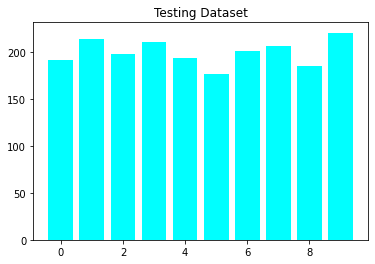

In [41]:
x2=np.array([0,1,2,3,4,5,6,7,8,9])
y2=np.array([0,0,0,0,0,0,0,0,0,0])
print(x2)
print(y2)

for i in range(2000):
  extra=np.where(x2==Y_test[i])
  y2[extra]=y2[extra]+1

plt.bar(x2,y2,color="cyan") 
plt.title("Testing Dataset")
plt.show()   

## Model

In [42]:
# model building

# You are supposed to look at some CNN architectures and add convolutional layers along with MaxPooling, specifying the kernel size, pooling size, activation 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model =Sequential([
    layers.Conv2D(32,3,activation='relu',input_shape=(28, 28,1)),
    layers.Conv2D(64, 3,activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3,activation='relu'),
    layers.MaxPooling2D(2),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dense_2 (Dense)             (None, 5, 5, 128)        

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


250/250 - 29s - loss: 1.0650 - accuracy: 0.7910 - val_loss: 0.1601 - val_accuracy: 0.9480 - 29s/epoch - 116ms/step
Epoch 2/50
250/250 - 28s - loss: 0.1990 - accuracy: 0.9386 - val_loss: 0.1043 - val_accuracy: 0.9655 - 28s/epoch - 111ms/step
Epoch 3/50
250/250 - 28s - loss: 0.1442 - accuracy: 0.9530 - val_loss: 0.0781 - val_accuracy: 0.9700 - 28s/epoch - 111ms/step
Epoch 4/50
250/250 - 28s - loss: 0.1021 - accuracy: 0.9669 - val_loss: 0.0775 - val_accuracy: 0.9760 - 28s/epoch - 111ms/step
Epoch 5/50
250/250 - 28s - loss: 0.0797 - accuracy: 0.9741 - val_loss: 0.0833 - val_accuracy: 0.9770 - 28s/epoch - 111ms/step
Epoch 6/50
250/250 - 28s - loss: 0.0846 - accuracy: 0.9726 - val_loss: 0.0680 - val_accuracy: 0.9765 - 28s/epoch - 111ms/step
Epoch 7/50
250/250 - 28s - loss: 0.0695 - accuracy: 0.9775 - val_loss: 0.0783 - val_accuracy: 0.9765 - 28s/epoch - 111ms/step
Epoch 8/50
250/250 - 28s - loss: 0.0692 - accuracy: 0.9771 - val_loss: 0.0743 - val_accuracy: 0.9800 - 28s/epoch - 111ms/step
Epo

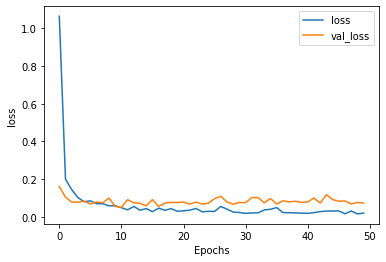

In [43]:
# Compile the model (add optimizers and metrics)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()
# Fit the model on the training data (specify validation_split, read about validation if new to you)

history = model.fit(X_train,Y_train,epochs=50,validation_data=(X_test,Y_test),verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)
print(test_loss)
print(test_acc)

## Predict some images
Print the image along with its label (true value) and predicted value.

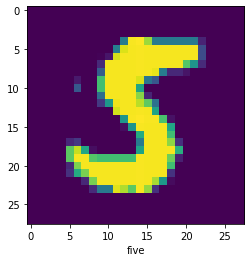

tf.Tensor(
[[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.23196931
  0.08533674 0.08533674 0.08533674 0.08533674]], shape=(1, 10), dtype=float32)

This image belongs to five with a 23.20 percent confidence.



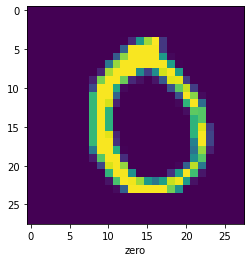

tf.Tensor(
[[0.23196931 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.08533674]], shape=(1, 10), dtype=float32)

This image belongs to zero with a 23.20 percent confidence.



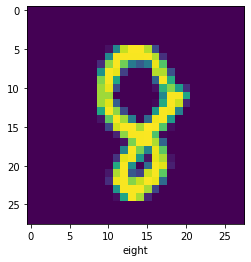

tf.Tensor(
[[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.23196931 0.08533674]], shape=(1, 10), dtype=float32)

This image belongs to eight with a 23.20 percent confidence.



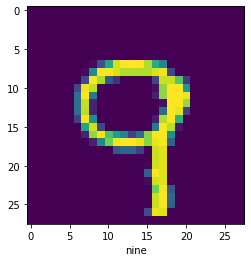

tf.Tensor(
[[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.23196931]], shape=(1, 10), dtype=float32)

This image belongs to nine with a 23.20 percent confidence.



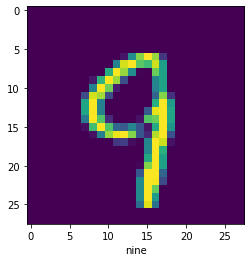

tf.Tensor(
[[0.08533674 0.08533674 0.08533674 0.08533674 0.08533674 0.08533674
  0.08533674 0.08533674 0.08533674 0.23196931]], shape=(1, 10), dtype=float32)

This image belongs to nine with a 23.20 percent confidence.



In [44]:
# Your code
import random

for _ in range(5):
  idx=random.randint(0,len(Y_test))
  plt.imshow(X_test[idx,:])
  plt.xlabel(class_names[Y_test[idx]])
  plt.show()

  pred=model.predict(X_test[idx,:].reshape(1,28,28))
  score= tf.nn.softmax(pred)
  print(score)
  print("\nThis image belongs to {} with a {:.2f} percent confidence.\n"
    .format(class_names[np.argmax(score)], 100 * np.max(score)))

#This can be another method

#img=X_test[idx,:]
#img_array = tf.keras.utils.img_to_array(img)
#img_array = tf.expand_dims(img_array, 0) # Create a batch

#predictions = model.predict(img_array)
#score = tf.nn.softmax(predictions[0])
#print(score)
#print("This image most likely belongs to {} with a {:.2f} percent confidence.".format(class_names[np.argmax(score)], 100 * np.max(score)))